# Figures for Literature Review

## Figure 1: Fractals

In [1]:
from matplotlib import pyplot as plt
from matplotlib import collections as mc
import math
%matplotlib inline

In [2]:
a = (0.0, 0.0)
e = (1.0, 0.0)
ae = (a,e)

In [9]:
def plot_segments(segments):
    fig, ax = plt.subplots()
    lines = mc.LineCollection(segments)
    ax.add_collection(lines)
    ax.margins(0.2)
    ax.set_aspect('equal')
    ax.autoscale()
    return ax

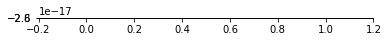

In [10]:
plot_segments([ae]);

<Figure size 432x288 with 0 Axes>

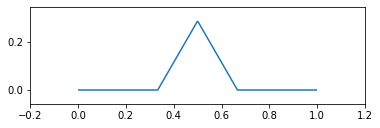

In [13]:
b = ((2*a[0]+e[0]/3, (2*a[1]+e[1])/3))
d = ((a[0]+2*e[0]/3, (a[1]+2*e[1])/3))
k = math.sqrt(3)/6
c = ((a[0]+e[0])/2 - k * (e[1]-a[1]), (a[1]+e[1])/2 + k *(e[0]-a[0]))
plt.gcf().clear()
plot_segments([(a,b), (b,c), (c,d), (d,e)]);

In [11]:
def recurse(segments):
    return [x for s in segments for x in f(s)]

In [14]:
def f(seg):
    a = seg[0]
    e = seg[1]
    b = ((2*a[0]+e[0])/3, (2*a[1]+e[1])/3)
    d = ((a[0]+2*e[0])/3, (a[1]+2*e[1])/3)
    k = math.sqrt(3)/6
    c = ((a[0]+e[0])/2 - k * (e[1]-a[1]), (a[1]+e[1])/2 + k *(e[0]-a[0]))
    return [(a,b), (b,c), (c,d), (d,e)]

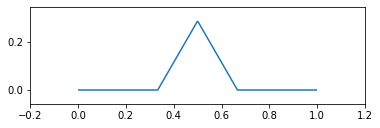

In [15]:
plot_segments(recurse([(a,e)]));

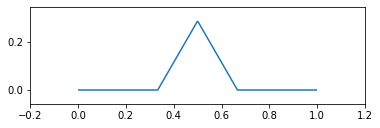

In [20]:
segements = [(a,e)]
for i in range(1):
    segements = recurse(segements)
plot_segments(segements);

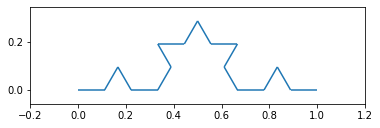

In [16]:
segements = [(a,e)]
for i in range(2):
    segements = recurse(segements)
plot_segments(segements);

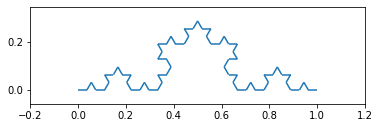

In [17]:
segements = [(a,e)]
for i in range(3):
    segements = recurse(segements)
plot_segments(segements);

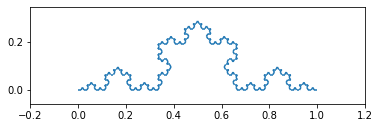

In [18]:
segements = [(a,e)]
for i in range(4):
    segements = recurse(segements)
plot_segments(segements);

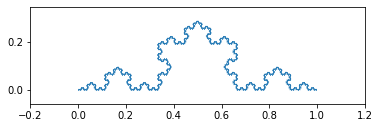

In [19]:
segements = [(a,e)]
for i in range(5):
    segements = recurse(segements)
plot_segments(segements);

# fBm fGn

## The two time signals below have the same H value (0.74) and time-points (1024)

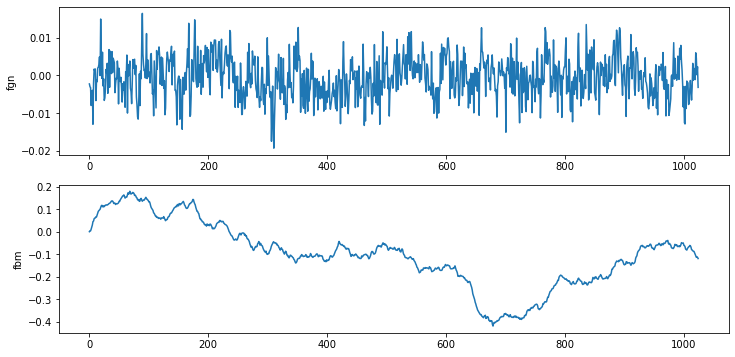

In [5]:
from fbm import FBM
f = FBM(n=1024, hurst=0.75, length=1, method='daviesharte')
fgn_sample = f.fgn()
fbm_sample = f.fbm()
import matplotlib.pyplot
#fgn_plot = matplotlib.pyplot.plot(fgn_sample)
matplotlib.pyplot.show()
fig = matplotlib.pyplot.figure(figsize=(12.0, 6.0))
axes1 = fig.add_subplot(2, 1, 1)
axes2 = fig.add_subplot(2, 1, 2)
axes1.set_ylabel('fgn')
axes1.plot(fgn_sample)
axes2.set_ylabel('fbm')
axes2.plot(fbm_sample)
matplotlib.pyplot.show()

# Hurst in BOLD: Grey, White, and CSF

In [11]:
import scipy
from scipy.signal import welch as welch
import multiprocessing
from joblib import Parallel, delayed
import os 
import nibabel as nib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Slice

In [14]:
example_slice = '/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/Fractal/FractalData/2020-09-17_BCCHR_test_AlexW/derivatives/func/FracTool_run1/filtered_func_data_clean.nii.gz'
slice_img = nib.load(example_slice, mmap=False)
slice_array = slice_img.get_fdata()
slice_sq = slice_array[:,:,30,:]


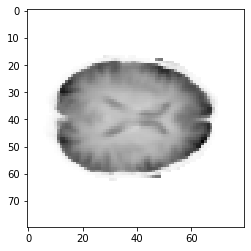

In [15]:
imgplot = plt.imshow(slice_sq[:,:,1],cmap='Greys',  interpolation='nearest')
plt.show()

## Grey Matter

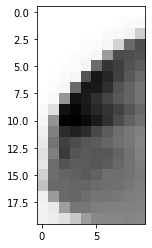

In [28]:
slice_sq = slice_array[20:40,10:20,30,:]
imgplot = plt.imshow(slice_sq[:,:,1],cmap='Greys',  interpolation='nearest')
plt.show()

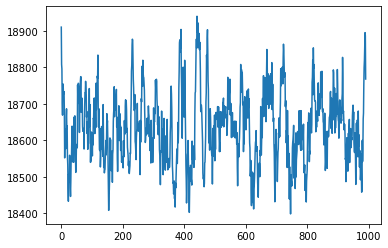

In [37]:
voxelg = slice_array[30,15,30,:]
plt.plot(voxelg)

0.6


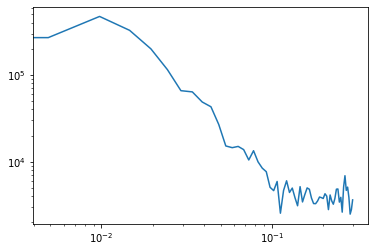

In [42]:
TR = slice_img.header.get_zooms()
TR = TR[3]
print(TR)
nperseg = math.floor(len(voxelg)/8)
noverlap = math.floor(nperseg/2)
wg = welch(voxelg, fs = TR, nperseg = nperseg, noverlap = noverlap)
plt.loglog(wg[0],wg[1])

In [51]:
from sklearn.linear_model import LinearRegression
xg = np.log10(wg[0])[1:].reshape((-1, 1))
yg = np.log10(wg[1])[1:]
modelg = LinearRegression().fit(xg, yg)
negbetag = modelg.coef_
betag = negbetag*-1
print('Beta =', round(float(betag),2))
print('H =', (round(float(betag),2)+1)/2)

Beta = 1.35
H = 1.175


<ipython-input-51-65e3d10799ca>:2: RuntimeWarning: divide by zero encountered in log10
  xg = np.log10(wg[0])[1:].reshape((-1, 1))


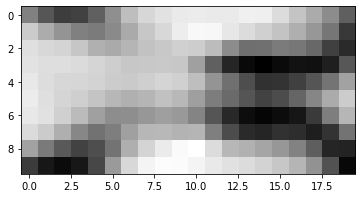

In [32]:
slice_mid = slice_array[35:45,30:50,30,:]
imgplot = plt.imshow(slice_mid[:,:,1],cmap='Greys',  interpolation='nearest')
plt.show()

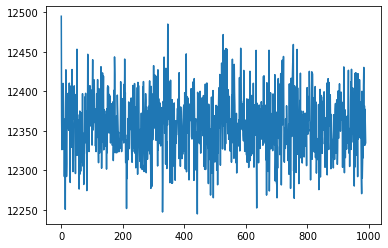

In [52]:
voxelc = slice_array[38,45,30,:]
plt.plot(voxelc)

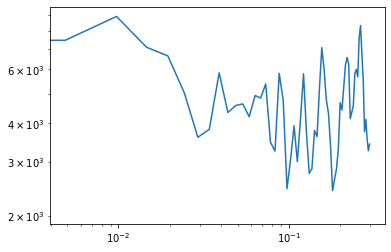

In [53]:

wc = welch(voxelc, fs = TR, nperseg = nperseg, noverlap = noverlap)
plt.loglog(wc[0],wc[1])

In [55]:
xc = np.log10(wc[0])[1:].reshape((-1, 1))
yc = np.log10(wc[1])[1:]
modelc = LinearRegression().fit(xc, yc)
negbetac = modelc.coef_
betac = negbetac*-1
print('Beta =', round(float(betac),2))
print('H =', (round(float(betac),2)+1)/2)

Beta = 0.08
H = 0.54


<ipython-input-55-46408b2653c6>:1: RuntimeWarning: divide by zero encountered in log10
  xc = np.log10(wc[0])[1:].reshape((-1, 1))


## White Matter

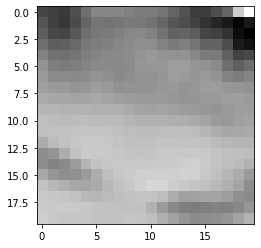

In [57]:
slice_sq = slice_array[20:40,30:50,30,:]
imgplot = plt.imshow(slice_sq[:,:,1],cmap='Greys',  interpolation='nearest')
plt.show()

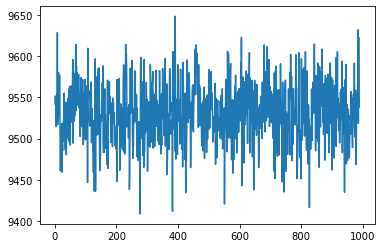

In [58]:
voxelw = slice_array[30,40,30,:]
plt.plot(voxelw)

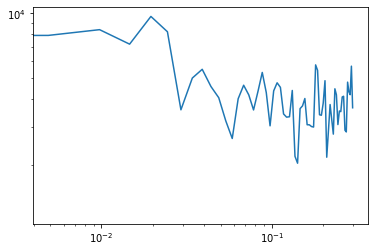

In [59]:
ww = welch(voxelw, fs = TR, nperseg = nperseg, noverlap = noverlap)
plt.loglog(ww[0],ww[1])

In [60]:
xw = np.log10(ww[0])[1:].reshape((-1, 1))
yw = np.log10(ww[1])[1:]
modelw = LinearRegression().fit(xw, yw)
negbetaw = modelw.coef_
betaw = negbetaw*-1
print('Beta =', round(float(betaw),2))
print('H =', (round(float(betaw),2)+1)/2)

Beta = 0.2
H = 0.6


<ipython-input-60-01949df122d8>:1: RuntimeWarning: divide by zero encountered in log10
  xw = np.log10(ww[0])[1:].reshape((-1, 1))
